In [13]:
# Imports
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
from PIL import Image as im
import sklearn
from sklearn import linear_model, datasets, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import time
import tensorflow as tf
from tensorflow import keras
import nbconvert
from tensorflow.keras import layers, models
from sklearn.model_selection import KFold
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential

In [14]:
# Paramètres
n, m = (30, 30) #taille des images
p = 43 #nombre de classes (si on utilise toute la BDD les calculs sont longs)

In [15]:
# Fonction permettant de lire les données (fournie par les auteurs de la base de données)
def readTrafficSigns(rootpath):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels'''
    images = [] # images
    labels = [] # corresponding labels
    # loop over all 42 classes
    for c in range(p):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        next(gtReader) # skip header
        # loop over all images in current annotations file
        for row in gtReader:
            images.append(plt.imread(prefix + row[0])) # the 1th column is the filename
            labels.append(row[7]) # the 8th column is the label
        gtFile.close()
    return images, labels

In [21]:
# Lecture des données
data = (readTrafficSigns("C:/Users/guill/PycharmProjects/GTSRB/Final_Training/Images"))

# Création du DataFrame
df = pd.DataFrame(data, ["data", "target"])
df = df.transpose()

# Resizing des images
for index, row in df.iterrows():
    image = row['data']
    resized = im.fromarray(image).resize((n,m))
    resized = np.asarray(resized)
    df.at[index, 'data'] = np.array(resized)

    
# Découpage du jeu de données 
X_train, X_test, y_train, y_test = train_test_split(df["data"], df["target"], test_size=0.33)

# Conversion
X_train, X_test, y_train, y_test = X_train.tolist(), X_test.tolist(), (y_train.astype(int)).tolist(), (y_test.astype(int)).tolist()
indices = X_train.index
indices2 = X_test.index

# Création des labels en vecteurs (ex : [0, 1, 0, 0, 0]) et conversion en tenseur tensorflow
y_trainflow = []
for i in range(len(y_train)):
    L = [0]*p
    L[y_train[i]] = 1
    y_trainflow.append(L)
y_trainflow = np.stack(np.array(y_trainflow))
y_train = tf.constant(y_trainflow)

y_testflow = []
for i in range(len(y_test)):
    L = [0]*p
    L[y_test[i]] = 1
    y_testflow.append(L)
y_testflow = np.stack(np.array(y_testflow))
y_test = tf.constant(y_testflow)


# On aplatit les images et on les convertit en tenseur tensorflow 
X_train = np.stack(np.array(X_train))/255
X_train = tf.constant(X_train)

X_test = np.stack(np.array(X_test))/255
X_test = tf.constant(X_test)

In [19]:
df.head()

,data,target
0,"[[[5, 9, 10], [2, 7, 7], [36, 36, 32], [75, 63...",0
1,"[[[75, 77, 77], [78, 79, 79], [77, 78, 78], [7...",0
2,"[[[201, 201, 201], [206, 206, 206], [204, 204,...",0
3,"[[[68, 67, 67], [76, 72, 73], [94, 84, 84], [1...",0
4,"[[[87, 87, 87], [87, 87, 87], [87, 87, 87], [1...",0


In [26]:
import pandas as pd
import numpy as np
import tensorflow as tf
from PIL import Image as im
from sklearn.model_selection import train_test_split

data_list, target_list = data  # Utilisez cette ligne si readTrafficSigns retourne un tuple de deux listes

# Création du DataFrame pour le dataset vandalisé
df_vandalised = pd.DataFrame({
    "data": data_list,
    "target": target_list
})

# Supposons que n, m, et p sont déjà définis (dimensions de l'image et nombre de classes)
# Resizing des images pour le dataset vandalisé
for index, row in df_vandalised.iterrows():
    image = row['data']
    resized = im.fromarray(image).resize((n, m))
    resized = np.asarray(resized)
    df_vandalised.at[index, 'data'] = resized

# Découpage du jeu de données pour le dataset vandalisé
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(df_vandalised["data"].tolist(), df_vandalised["target"].astype(int).tolist(), test_size=0.33)

# Création des labels en vecteurs pour le dataset vandalisé et conversion en tenseur tensorflow
y_train_v_flow = np.array([np.eye(p)[label] for label in y_train_v])
y_train_v = tf.constant(y_train_v_flow)

y_test_v_flow = np.array([np.eye(p)[label] for label in y_test_v])
y_test_v = tf.constant(y_test_v_flow)

# On aplatit les images pour le dataset vandalisé et on les convertit en tenseur tensorflow
X_train_v = np.array(X_train_v) / 255.0
X_train_v = tf.constant(X_train_v, dtype=tf.float32)

X_test_v = np.array(X_test_v) / 255.0
X_test_v = tf.constant(X_test_v, dtype=tf.float32)


246/246 [==============================] - 0s 2ms/step


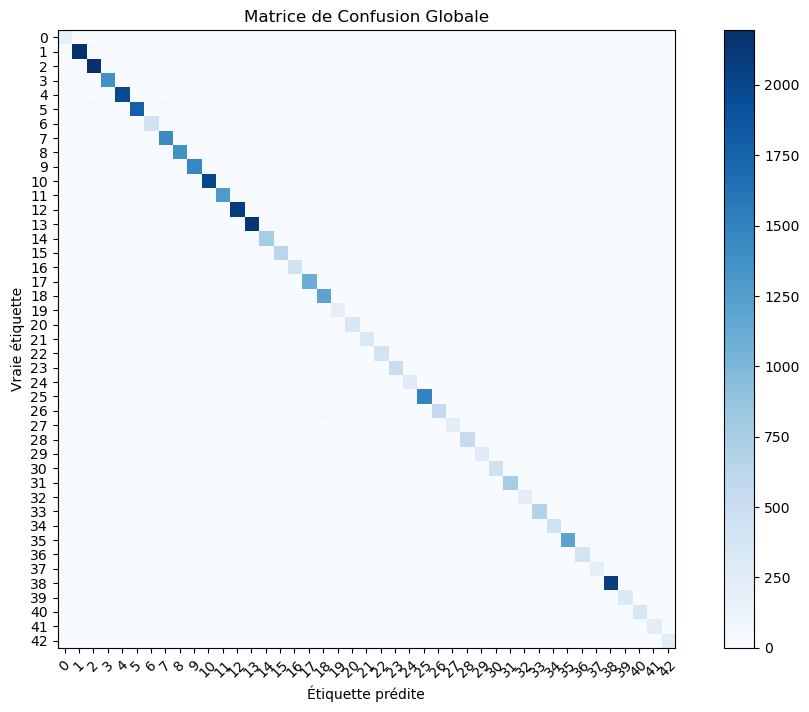

              precision    recall  f1-score   support

    Classe 0       1.00      0.94      0.97       210
    Classe 1       0.99      0.98      0.98      2220
    Classe 2       0.98      0.98      0.98      2250
    Classe 3       0.98      0.98      0.98      1410
    Classe 4       0.98      0.99      0.99      1980
    Classe 5       0.97      0.95      0.96      1860
    Classe 6       0.99      0.99      0.99       420
    Classe 7       0.96      0.98      0.97      1440
    Classe 8       0.98      0.97      0.97      1410
    Classe 9       0.98      0.99      0.99      1470
   Classe 10       0.99      0.99      0.99      2010
   Classe 11       0.99      0.98      0.98      1320
   Classe 12       0.99      1.00      1.00      2100
   Classe 13       1.00      0.99      0.99      2160
   Classe 14       1.00      0.99      1.00       780
   Classe 15       0.99      0.99      0.99       630
   Classe 16       1.00      0.99      0.99       420
   Classe 17       1.00    

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Fonction pour créer et compiler le modèle
def build_model(n, m, p):
    model = models.Sequential([
        layers.Input(shape=(n, m, 3)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(p, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Supposons que X_train, X_test, y_train, y_test sont déjà définis, et n, m, p aussi

# Combinez les datasets
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

# Supposons que y est déjà sous forme catégorique; sinon, utilisez to_categorical
# y = to_categorical(y, num_classes=p)

k = 5
kf = KFold(n_splits=k, shuffle=True)

all_predictions = []
all_true_labels = []
all_pred_prob = []

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    
    model = build_model(n, m, p)  # Réinitialisez le modèle à chaque itération
    model.fit(X_train_fold, y_train_fold, epochs=5, verbose=0)
    
    pred_prob = model.predict(X_test_fold)
    predicted_classes = np.argmax(pred_prob, axis=1)
    true_classes = np.argmax(y_test_fold, axis=1)
    
    all_pred_prob.extend(pred_prob)
    all_predictions.extend(predicted_classes)
    all_true_labels.extend(true_classes)

# Binarisation pour AUC si nécessaire
y_bin = label_binarize(all_true_labels, classes=np.unique(all_true_labels))
if y_bin.shape[1] == 1:
    y_bin = np.hstack((1 - y_bin, y_bin))

auc_scores = roc_auc_score(y_bin, all_pred_prob, average=None, multi_class="ovr")

# Affichage de la matrice de confusion
plt.figure(figsize=(10, 7))
conf_matrix = confusion_matrix(all_true_labels, all_predictions)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matrice de Confusion Globale')
plt.colorbar()
tick_marks = np.arange(len(np.unique(all_true_labels)))
plt.xticks(tick_marks, np.unique(all_true_labels), rotation=45)
plt.yticks(tick_marks, np.unique(all_true_labels))
plt.tight_layout()
plt.ylabel('Vraie étiquette')
plt.xlabel('Étiquette prédite')
plt.show()

# Affichage des métriques par classe et des scores AUC
print(classification_report(all_true_labels, all_predictions, target_names=[f'Classe {i}' for i in np.unique(all_true_labels)]))
for i, score in enumerate(auc_scores):
    print(f'Classe {i} AUC: {score:.3f}')


In [35]:
from tensorflow.keras import layers, models
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.losses import CategoricalCrossentropy

model = models.Sequential([
    layers.Input(shape=(n,m,3)),  # Utiliser Input pour définir la forme d'entrée
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(p, activation='softmax')  # Assurez-vous que p correspond au nombre de classes de votre problème
])

# Compiler le modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Afficher un résumé du modèle
model.summary()

# Fonction pour évaluer le modèle
def evaluate_model(model, X_test, y_test):
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    return test_loss, test_accuracy

# Fonction pour entraîner et tester le modèle
def train_and_evaluate(X_train, X_test, y_train, y_test, n, m, p):
    model = build_model(n, m, p)
    model.compile(optimizer='adam', loss=CategoricalCrossentropy(), metrics=[CategoricalAccuracy()])
    
    # Entraînement du modèle
    model.fit(X_train, y_train, epochs=25, verbose=2)
    
    # Évaluation du modèle
    test_loss, test_accuracy = evaluate_model(model, X_test, y_test)
    
    return test_loss, test_accuracy

# Entraînement et évaluation sur le dataset original
test_loss, test_accuracy = train_and_evaluate(X_train, X_test, y_train, y_test, n, m, p)
print("Dataset Original - Loss: {:.4f}, Accuracy: {:.4f}".format(test_loss, test_accuracy))

# Entraînement et évaluation sur le dataset vandalisé
test_loss_v, test_accuracy_v = train_and_evaluate(X_train, X_test_v, y_train, y_test_v, n, m, p)
print("Dataset Vandalisé - Loss: {:.4f}, Accuracy: {:.4f}".format(test_loss_v, test_accuracy_v))


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_57 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_58 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_20 (Flatten)        (None, 1024)            

Epoch 1/25
821/821 [==============================] - 4s 4ms/step - loss: 1.8093 - accuracy: 0.5168 - val_loss: 1.0278 - val_accuracy: 0.7105
Epoch 2/25
821/821 [==============================] - 3s 4ms/step - loss: 0.8250 - accuracy: 0.7743 - val_loss: 0.7514 - val_accuracy: 0.7959
Epoch 3/25
821/821 [==============================] - 4s 4ms/step - loss: 0.6157 - accuracy: 0.8303 - val_loss: 0.6769 - val_accuracy: 0.8220
Epoch 4/25
821/821 [==============================] - 4s 4ms/step - loss: 0.4933 - accuracy: 0.8634 - val_loss: 0.6386 - val_accuracy: 0.8339
Epoch 5/25
821/821 [==============================] - 3s 4ms/step - loss: 0.4133 - accuracy: 0.8842 - val_loss: 0.6156 - val_accuracy: 0.8412
Epoch 6/25
821/821 [==============================] - 4s 4ms/step - loss: 0.3646 - accuracy: 0.8950 - val_loss: 0.5688 - val_accuracy: 0.8605
Epoch 7/25
821/821 [==============================] - 4s 4ms/step - loss: 0.3086 - accuracy: 0.9100 - val_loss: 0.5995 - val_accuracy: 0.8569
Epoch 

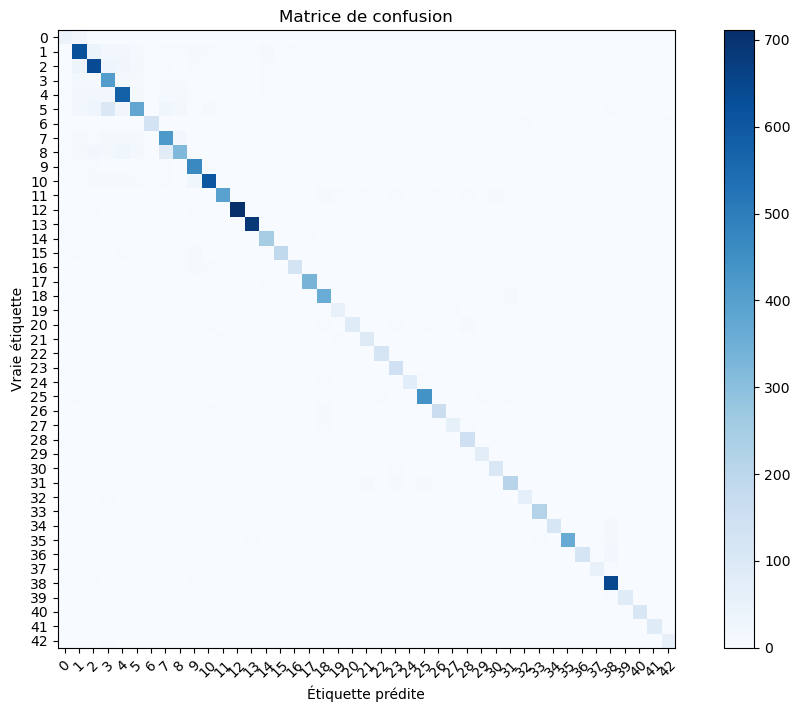

              precision    recall  f1-score   support

           0       0.95      0.56      0.71        71
           1       0.78      0.84      0.81       746
           2       0.80      0.84      0.82       754
           3       0.64      0.86      0.74       472
           4       0.81      0.84      0.83       687
           5       0.83      0.61      0.70       620
           6       0.93      0.90      0.91       144
           7       0.75      0.85      0.80       494
           8       0.85      0.66      0.74       485
           9       0.84      0.96      0.90       482
          10       0.93      0.89      0.91       675
          11       0.93      0.89      0.91       440
          12       0.98      0.98      0.98       729
          13       0.98      0.98      0.98       702
          14       0.89      0.98      0.93       253
          15       0.94      0.88      0.91       213
          16       0.95      0.86      0.90       145
          17       0.95    

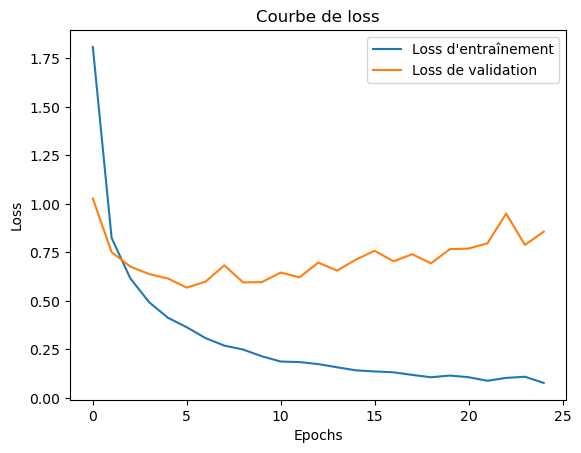

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import Adam

# Supposons que n, m, et p sont définis (dimensions de l'image et nombre de classes)
# Supposons aussi que X_train_v, y_train_v, X_test_v, y_test_v sont prêts pour l'entraînement et le test

# Définition du modèle (exemple simple)
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(n, m, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(p, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_test_v, y_test_v))

# Prédiction sur le dataset vandalisé
y_pred_v = np.argmax(model.predict(X_test_v), axis=1)
y_true_v = np.argmax(y_test_v.numpy(), axis=1)  # Conversion si y_test_v est un tensor

# Matrice de confusion
conf_matrix_v = confusion_matrix(y_true_v, y_pred_v)

# Affichage de la matrice de confusion
plt.figure(figsize=(10, 7))
plt.imshow(conf_matrix_v, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matrice de confusion')
plt.colorbar()
tick_marks = np.arange(p)
plt.xticks(tick_marks, rotation=45)
plt.yticks(tick_marks)
plt.tight_layout()
plt.ylabel('Vraie étiquette')
plt.xlabel('Étiquette prédite')
plt.show()

# Rapport de classification
print(classification_report(y_true_v, y_pred_v))

# Courbe de loss
plt.plot(history.history['loss'], label='Loss d\'entraînement')
plt.plot(history.history['val_loss'], label='Loss de validation')
plt.title('Courbe de loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
